In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, kstest

In [17]:
def poker_counts(U):

    patterns = np.zeros(7, dtype=int)

    # Convert numbers to "cards" 0-9
    cards = np.floor(U * 10).astype(int)

    num_hands = len(cards) // 5

    for i in range(num_hands):
        hand = cards[i*5 : (i+1)*5]

        # Count occurrences of each digit
        counts = np.bincount(hand, minlength=10)
        sorted_counts = np.sort(counts[counts > 0])[::-1]  # descending, non-zero

        # Determine pattern
        if np.array_equal(sorted_counts, [1,1,1,1,1]):
            pattern_index = 0  # all different
        elif np.array_equal(sorted_counts, [2,1,1,1]):
            pattern_index = 1  # one pair
        elif np.array_equal(sorted_counts, [2,2,1]):
            pattern_index = 2  # two pairs
        elif np.array_equal(sorted_counts, [3,1,1]):
            pattern_index = 3  # three of a kind
        elif np.array_equal(sorted_counts, [3,2]):
            pattern_index = 4  # full house
        elif np.array_equal(sorted_counts, [4,1]):
            pattern_index = 5  # four of a kind
        elif np.array_equal(sorted_counts, [5]):
            pattern_index = 6  # five of a kind
        else:
            pattern_index = -1  # not classified

        if pattern_index >= 0:
            patterns[pattern_index] += 1

    return patterns

In [18]:
from rng_xor_shift import XORShiftRNG
from rng_lcg import LCG

# rng = XORShiftRNG(seed=123456, q=13, r=17, s=5)
rng = LCG(seed=123456)

# Generate N random numbers in [0,1)
N = int(1e5)
U = np.array(rng.generate_sequence(N, scale=True))

## **PokerChiSquare-Test**

In [27]:
patterns = poker_counts(U)
pattern_names = [
    "all different", "one pair", "two pairs", "three of a kind",
    "full house", "four of a kind", "five of a kind"
]

print("Poker test counts (groups of 5 digits):")
for name, count in zip(pattern_names, patterns):
    print(f"{name}: {count}")

Poker test counts (groups of 5 digits):
all different: 5982
one pair: 10099
two pairs: 2226
three of a kind: 1402
full house: 196
four of a kind: 95
five of a kind: 0


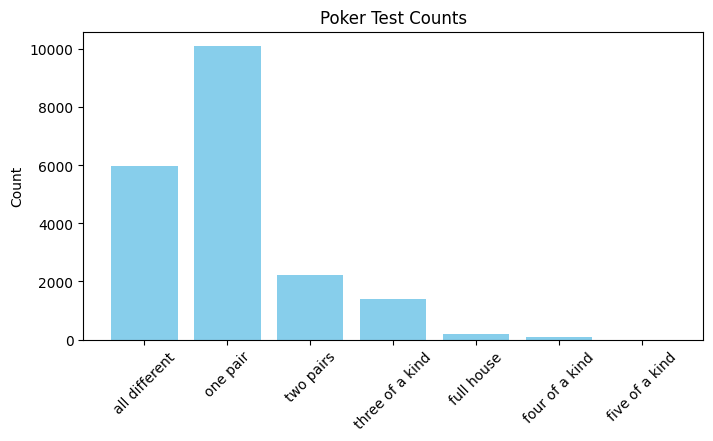

In [28]:
plt.figure(figsize=(8,4))
plt.bar(pattern_names, patterns, color='skyblue')
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.title("Poker Test Counts")
plt.show()

In [29]:
expected_probs = np.array([0.3024, 0.5040, 0.1080, 0.0720, 0.0090, 0.0045, 0.0001])
expected_counts = expected_probs * patterns.sum()

chi2_stat = ((patterns - expected_counts)**2 / expected_counts).sum()
df = len(patterns) - 1
p_value = 1 - chi2.cdf(chi2_stat, df)

print(f"Chi-square statistic: {chi2_stat:.2f}, df={df}, p-value={p_value:.4f}")

Chi-square statistic: 7.48, df=6, p-value=0.2791


## **KS-Test**

In [30]:
ks_stat, ks_p = kstest(U, 'uniform')
print("\nKolmogorov-Smirnov (KS) test:")
print(f"KS statistic = {ks_stat:.4f}, p-value = {ks_p:.4f}")


Kolmogorov-Smirnov (KS) test:
KS statistic = 0.0042, p-value = 0.0604


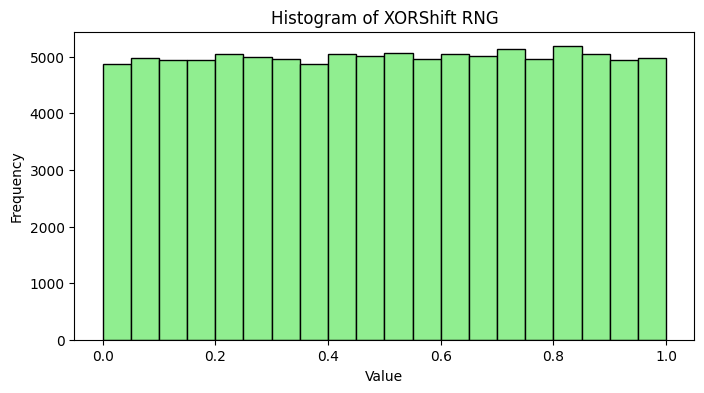

In [31]:
# Visualize histogram of U
plt.figure(figsize=(8,4))
plt.hist(U, bins=20, edgecolor='k', color='lightgreen')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of XORShift RNG")
plt.show()

## **Lattice-Test**

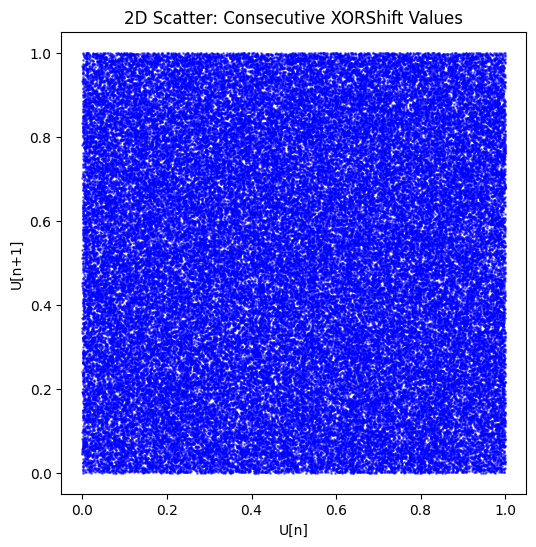

In [32]:
x = U[:-1]   # U[0] to U[-2]
y = U[1:]    # U[1] to U[-1]

plt.figure(figsize=(6,6))
plt.scatter(x, y, s=1, alpha=0.5, color='blue')
plt.xlabel('U[n]')
plt.ylabel('U[n+1]')
plt.title('2D Scatter: Consecutive XORShift Values')
plt.show()

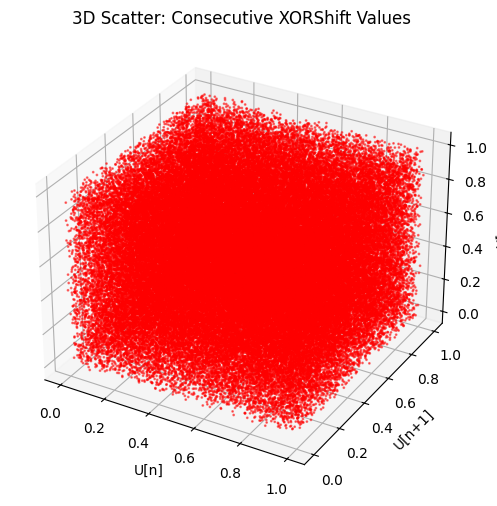

In [33]:
x3 = U[:-2]   # U[0] to U[-3]
y3 = U[1:-1]  # U[1] to U[-2]
z3 = U[2:]    # U[2] to U[-1]

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x3, y3, z3, s=1, alpha=0.5, color='red')
ax.set_xlabel('U[n]')
ax.set_ylabel('U[n+1]')
ax.set_zlabel('U[n+2]')
ax.set_title('3D Scatter: Consecutive XORShift Values')
plt.show()